In [11]:
#!pip install contractions

  Obtaining dependency information for contractions from https://files.pythonhosted.org/packages/bb/e4/725241b788963b460ce0118bfd5c505dd3d1bdd020ee740f9f39044ed4a7/contractions-0.1.73-py2.py3-none-any.whl.metadata
  Obtaining dependency information for textsearch>=0.0.21 from https://files.pythonhosted.org/packages/e2/0f/6f08dd89e9d71380a369b1f5b6c97a32d62fc9cfacc1c5b8329505b9e495/textsearch-0.0.24-py2.py3-none-any.whl.metadata
  Obtaining dependency information for anyascii from https://files.pythonhosted.org/packages/4f/7b/a9a747e0632271d855da379532b05a62c58e979813814a57fa3b3afeb3a4/anyascii-0.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for pyahocorasick from https://files.pythonhosted.org/packages/f6/ad/2852dba3e9027cb22adfe1563733571d58a9fb36fd8dbaedd00012369223/pyahocorasick-2.0.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/289.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/289.9 kB ? eta -:--:--
   -

In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import contractions

import string

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
df_org = pd.read_csv("talks_info.csv")
df = df_org[['_id', 'duration', 'likes', 'speakers', 'subtitle_languages', 'summary', 'title', 'transcript', 'views', 'recorded_date']]
df["transcript"] = df.transcript.astype("string")

stopws = stopwords.words("english")
def process_text(conversation):
    
    # expand contractions
    contractions_stuff = [contractions.fix(word) for word in conversation.split()]
    conversation = ' '.join(contractions_stuff)
    
    # convert to lowercase
    conversation = conversation.lower()
    
    # remove punctuation
    convo = "".join([char for char in conversation if char not in string.punctuation])
    
    # tokenize words
    words_tok = word_tokenize(convo)
    
    # remove stopwords
    removed = [word for word in words_tok if word not in stopws]

    # lemmatization
    lemm = WordNetLemmatizer()
    lemmed = [lemm.lemmatize(word) for word in removed]
    
    # put string together
    final_text = " ".join(lemmed)

    return final_text

#transcript = df['transcript'][0]
#print(transcript)
#processed_transcript = process_text(transcript)
#print(processed_transcript)
#df['processed_transcript'] = df['transcript'].apply(process_text)
#print(df)

C:\Users\chris\AppData\Local\Temp\ipykernel_13628\2241949326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transcript"] = df.transcript.astype("string")


In [17]:
sid = SentimentIntensityAnalyzer()

In [18]:
def analyze_sentiment(text):
    try:
        blob = TextBlob(text)
        sentiment_score = blob.sentiment.polarity
        return sentiment_score
    except:
        sentiment_score = 0
        return sentiment_score

In [23]:
#tb_score = analyze_sentiment(processed_transcript)
#print(tb_score)
df['tb_score'] = df['transcript'].apply(analyze_sentiment)
df[0:5]

#vader_score = sid.polarity_scores(processed_transcript)
#print(vader_score)

C:\Users\chris\AppData\Local\Temp\ipykernel_13628\2998811370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tb_score'] = df['transcript'].apply(analyze_sentiment)


,_id,duration,likes,speakers,subtitle_languages,summary,title,transcript,views,recorded_date,tb_score,vd_score
0,21,992,17K,"[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"Over the past couple of days, as I've been pre...",589115,2006-02-23,0.138707,0.9985
1,1,957,110K,"[{""name"":""Al Gore"",""occupation"":""Climate advoc...","[{""name"":""Greek"",""code"":""el""},{""name"":""Gujarat...",With the same humor and humanity he exuded in ...,Averting the climate crisis,"Thank you so much, Chris. And it's truly a gre...",3671801,2006-02-25,0.161357,0.9995
2,7,1266,60K,"[{""name"":""David Pogue"",""occupation"":""Technolog...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",New York Times columnist David Pogue takes aim...,Simplicity sells,"(Music: ""The Sound of Silence,"" Simon &amp; Ga...",2008487,2006-02-24,0.147341,0.9997
3,47,1126,80K,"[{""name"":""David Deutsch"",""occupation"":""Physici...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",Legendary scientist David Deutsch puts theoret...,Chemical scum that dream of distant quasars,We've been told to go out on a limb and say so...,2694257,2005-07-14,0.066619,0.9976
4,55,1524,14K,"[{""name"":""Jehane Noujaim"",""occupation"":""Filmma...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...",Jehane Noujaim unveils her 2006 TED Prize wish...,My wish: A global day of film,I can't help but this wish: to think about whe...,489757,2006-02-26,0.110659,0.9998


In [21]:
df['vd_score'] = df['transcript'].apply(lambda comments:sid.polarity_scores(str(comments))['compound'])
df[0:5]

C:\Users\chris\AppData\Local\Temp\ipykernel_13628\999831878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vd_score'] = df['transcript'].apply(lambda comments:sid.polarity_scores(str(comments))['compound'])


,_id,duration,likes,speakers,subtitle_languages,summary,title,transcript,views,recorded_date,tb_score,vd_score
0,21,992,17K,"[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"Over the past couple of days, as I've been pre...",589115,2006-02-23,0.138707,0.9985
1,1,957,110K,"[{""name"":""Al Gore"",""occupation"":""Climate advoc...","[{""name"":""Greek"",""code"":""el""},{""name"":""Gujarat...",With the same humor and humanity he exuded in ...,Averting the climate crisis,"Thank you so much, Chris. And it's truly a gre...",3671801,2006-02-25,0.161357,0.9995
2,7,1266,60K,"[{""name"":""David Pogue"",""occupation"":""Technolog...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",New York Times columnist David Pogue takes aim...,Simplicity sells,"(Music: ""The Sound of Silence,"" Simon &amp; Ga...",2008487,2006-02-24,0.147341,0.9997
3,47,1126,80K,"[{""name"":""David Deutsch"",""occupation"":""Physici...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",Legendary scientist David Deutsch puts theoret...,Chemical scum that dream of distant quasars,We've been told to go out on a limb and say so...,2694257,2005-07-14,0.066619,0.9976
4,55,1524,14K,"[{""name"":""Jehane Noujaim"",""occupation"":""Filmma...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...",Jehane Noujaim unveils her 2006 TED Prize wish...,My wish: A global day of film,I can't help but this wish: to think about whe...,489757,2006-02-26,0.110659,0.9998


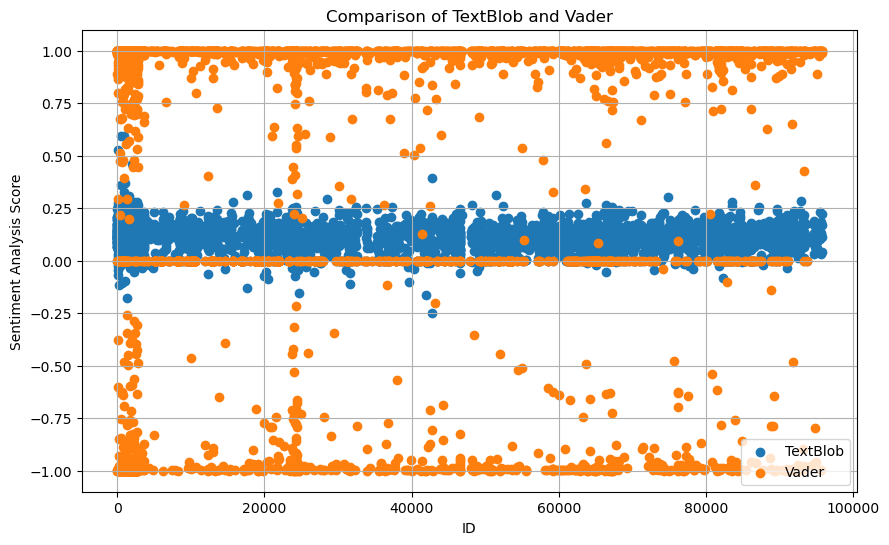

In [26]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(df['_id'], df['tb_score'], label='TextBlob', marker='o')
plt.scatter(df['_id'], df['vd_score'], label='Vader', marker='o')

plt.xlabel('ID')
plt.ylabel('Sentiment Analysis Score')
plt.title('Comparison of TextBlob and Vader')
plt.legend()  # Show legend

plt.grid(True)  # Add grid
plt.show()

In [27]:
df.describe()

,_id,duration,views,tb_score,vd_score
count,5631.000000,5631.000000,5.631000e+03,5631.000000,5631.000000
mean,25686.568460,707.691529,2.130394e+06,0.104575,0.589144
std,29649.007114,521.179373,3.679481e+06,0.065570,0.704168
min,1.000000,60.000000,5.870000e+02,-0.247403,-1.000000
25%,1642.500000,355.000000,6.781540e+05,0.065139,0.000000
50%,9807.000000,682.000000,1.392074e+06,0.110328,0.996100
75%,50009.500000,926.500000,2.182300e+06,0.146871,0.999400
max,95714.000000,20404.000000,7.338914e+07,0.594877,1.000000


In [ ]:
# this code will have to be heavily edited for our dataframe
textblob_big_df = pd.DataFrame()
vader_big_df = pd.DataFrame()


for listing, review in zip(listings_list, reviews_list):
    listings_df = pd.read_csv(listing)
    reviews_df = pd.read_csv(review)
    # get city and state from url
    url_parts = listing.split('/')
    state_name = url_parts[-5]
    city_name = url_parts[-4]
    city_name = city_name.replace("-", " ")
    listings_df = listings_df[['id','name','latitude','longitude','price','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
    listings_df['state'] = state_name.upper()
    listings_df['city'] = city_name.title()
    listings_df['average'] = listings_df[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].mean(axis=1)
    listings_df = listings_df.groupby('id').agg({'name':'first', 'latitude':'first','longitude':'first','price':'first','average':'mean','state':'first','city':'first'})
    reviews_df = reviews_df[['listing_id','comments']]
    reviews_df = reviews_df.rename(columns={'listing_id':'id'})
    reviews_df['comments'] = reviews_df['comments'].replace('[^a-zA-Z\s]', '', regex=True)
    textblob_df = reviews_df
    textblob_df['sentiment_score'] = textblob_df['comments'].apply(analyze_sentiment)
    textblob_df = textblob_df.groupby('id').agg({'sentiment_score': 'mean'})
    textblob_df = pd.merge(listings_df,textblob_df, on = 'id')
    textblob_big_df = textblob_big_df.append(textblob_df)
    vader_df = reviews_df
    vader_df['sentiment_score'] = vader_df['comments'].apply(lambda comments:sid.polarity_scores(str(comments))['compound'])
    vader_df = vader_df.groupby('id').agg({'sentiment_score': 'mean'})
    vader_df = pd.merge(listings_df,vader_df, on = 'id')
    vader_big_df = vader_big_df.append(vader_df)
    print("Complete", city_name, state_name)